In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.4 MB 6.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.4 MB 5.4 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/16.4 MB 4.1 MB/s eta 0:00:04
   -------- ------------------------------- 3.7/16.4 MB 4.4 MB/s eta 0:00:03
   ---------- ----------------------------- 4.5/16.4 MB 4.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.2/16.4 MB 4.2 MB/s eta 0:00:03
   --------------- ------------------------ 6.3/16.4 MB 4.2 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.4 MB 4.2 MB/s eta 0:00:03
   ------------------- -------------------- 8.1/16.4 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 8.9/16.4 MB 4.2 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.4 MB 4.2 MB/s eta 0:00:02
   ------------------------- -------------- 10.5/16.4 MB 4.2 MB/s eta 0:00:02
   -

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

In [3]:
import mysql.connector

In [4]:
import os


In [5]:
# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')
]

In [6]:
# connect to Mysql database
conn=mysql.connector.connect(
    host='localhost',
    user='root',
    password='Tithi@31',
    database='ecommerce'
)

In [13]:
folder_path=r"C:\Users\tithi\Desktop\DATA ANALYST\SQL+PYTHON project\Ecommerce"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns

conn=mysql.connector.connect(host="localhost",
                             username="root",
                             password="Tithi@31",
                             database="ecommerce")

cursor = conn.cursor()


# 1. List all unique cities where customers are located.

In [19]:
query="""select distinct customer_city from customers"""

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=["City"])

df.head()

,City
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2. Count the number of orders placed in 2017.

In [30]:
query1="""select count(*) as Number_of_Orders from Orders where year(order_purchase_timestamp)=2017"""

cursor.execute(query1)

Number_of_Orders=cursor.fetchall()

Number_of_Orders[0][0]

"total orders placed in 2017",Number_of_Orders[0][0]

('total orders placed in 2017', 45101)

# 3. Find the total sales per category.

In [38]:
query1="""select upper(p.product_category) as category,round(sum(pm.payment_value),2) as sales from products p inner join order_items oi
on p.product_id=oi.product_id
inner join payments pm on pm.order_id=oi.order_id
group by product_category"""

cursor.execute(query1)

category=cursor.fetchall()

df=pd.DataFrame(category,columns=['Catrgory','Sales'])

df

,Catrgory,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# 4. Calculate the percentage of orders that were paid in installments.

In [41]:


query1="""select ((select count(order_id) from payments where payment_installments>=1)/(select count(*) from payments))*100 as percentage"""

cursor.execute(query1)

percentage=cursor.fetchall()

percentage

[(Decimal('99.9981'),)]

# 5. Count the number of customers from each state. 

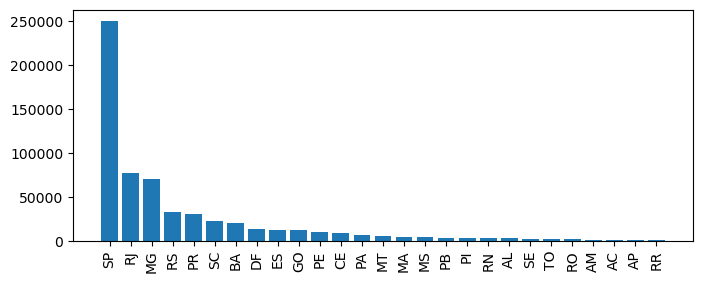

In [44]:
query1="""select customer_state, count(customer_id) as number_of_customers from customers
group by customer_state order by count(customer_id) desc"""

cursor.execute(query1)

number_of_customers=cursor.fetchall()

df=pd.DataFrame(number_of_customers,columns=["State","Number_of_Cust"])
#df=df.sort_values(by="Number_of_Cust",ascending=False)

plt.figure(figsize=(8,3))
ax=plt.bar(df["State"],df["Number_of_Cust"])
plt.xticks(rotation=90)
plt.show()

# 6. Calculate the number of orders per month in 2018.

Text(0.5, 0, 'NUmbers of Orders for each month ')

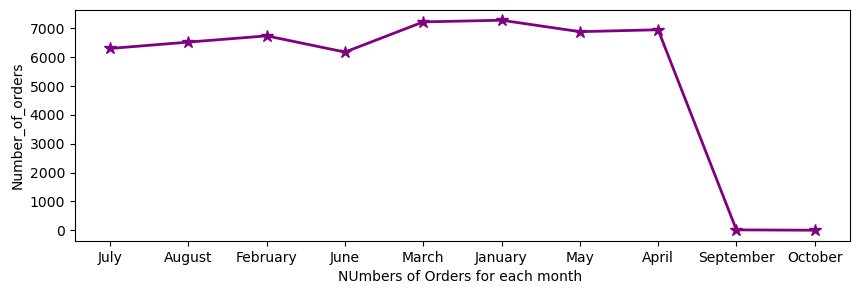

In [41]:
query= """select monthname(order_purchase_timestamp) as Months ,count(*) from orders where year(order_purchase_timestamp) =2018 
group by monthname(order_purchase_timestamp) """

cursor.execute(query)

per_month_orders=cursor.fetchall()
data=['January','February','March','April','May','July','June','August','September','October','November','December']
df=pd.DataFrame(per_month_orders,columns=["Months","Number_of_orders"],)
# df=df.sort_values(by=data)

plt.figure(figsize=(10,3))
plt.plot(df['Months'],df['Number_of_orders'],marker='*',linewidth=2,markersize=9,color='Purple')
plt.xlabel("Months")
plt.ylabel("Number_of_orders")
plt.xlabel("NUmbers of Orders for each month ")

# 2. Find the average number of products per order, grouped by customer city.

In [49]:
query='''with count_per_order as(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,round(avg(count_per_order.oc),2) as average_count from count_per_order join customers
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average_count'''

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['City','average products per order'])
df.head(10)


,City,average products per order
0,fortim,1.00
1,cairu,1.00
2,epitaciolandia,1.00
3,serranopolis,1.00
4,urucania,1.00
5,brotas de macaubas,1.00
6,tunapolis,1.00
7,porto calvo,1.00
8,ipupiara,1.00
9,capela do alto alegre,1.00


# 3. Calculate the percentage of total revenue contributed by each product category.

In [50]:
query='''select p.product_category as category,round(sum(pm.payment_value)/(select sum(payment_value) from payments)*100 ,2) as sales_percentage 
from products p inner join order_items oi
on p.product_id=oi.product_id
inner join payments pm on pm.order_id=oi.order_id
group by product_category
order by sales_percentage desc'''

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['Category','Sales_percentage'])
df.head(10)


,Category,Sales_percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [55]:
import numpy as np;


query='''select product_category,round(avg(price),2) as price,count(oi.product_id) as order_count from order_items oi inner join products p
on oi.product_id=p.product_id
group by product_category
order by order_count desc'''

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['Category','avg_price','order_count'])
df.head(10)


arr1=df['order_count']
arr2=df['avg_price']
a=np.corrcoef([arr1,arr2])

print('the corelation between price and the number of times a product has been purchased is',a[0][1])

the corelation between price and the number of times a product has been purchased is -0.10631514167157564


# 5. Calculate the total revenue generated by each seller, and rank them by revenue.

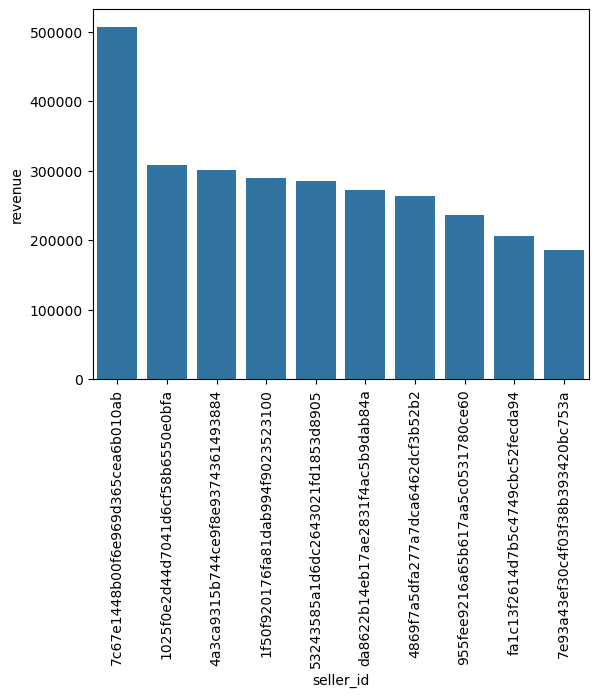

In [62]:
query='''with cte as(select oi.seller_id as seller_id, round(sum(payment_value),2) as revenue from order_items oi join sellers s
on oi.seller_id=s.seller_id
join payments p 
on oi.order_id=p.order_id
group by oi.seller_id)

select seller_id,revenue, rank() over(order by revenue desc) as ranking from cte'''

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df=df.head(10)

sns.barplot(x='seller_id',y='revenue',data=df)
plt.xticks(rotation=90)
plt.xlable=df['seller_id']
plt.ylable=df['revenue']

# . Calculate the moving average of order values for each customer over their order history.

In [5]:
query='''select customer_id,order_purchase_timestamp,payment,avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row ) as moving_avg
from (select o.customer_id,o.order_purchase_timestamp,p.payment_value as payment from payments p join orders o
on p.order_id=o.order_id) as a'''

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['Customer_id','order_purchase_timestamp','Payment','Moving_avg'])
df=df.head(10)



,Customer_id,order_purchase_timestamp,Payment,Moving_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
5,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800003
6,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400002
7,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.589996
8,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230003
9,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.709961


# 2. Calculate the cumulative sales per month for each year.

In [7]:
query='''select year,month,sum(payment) over(order by year,month ) as cumulative_sum from
(select month(o.order_purchase_timestamp) as month,year(o.order_purchase_timestamp)as year,sum(payment_value) as payment from orders o join payments p
on o.order_id=p.order_id group by year,month) as a;'''


cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['Year','Month','Cumulative Sales'])
df=df.head(10)

df

,Year,Month,Cumulative Sales
0,2016,9,2.522400e+02
1,2016,10,5.934272e+04
2,2016,12,5.936234e+04
3,2017,1,1.978504e+05
4,2017,2,4.897584e+05
5,2017,3,9.396220e+05
6,2017,4,1.357410e+06
7,2017,5,1.950329e+06
8,2017,6,2.461605e+06
9,2017,7,3.053988e+06


# 3. Calculate the year-over-year growth rate of total sales.

In [12]:
query='''with cte as(select year(o.order_purchase_timestamp)as year,sum(payment_value) as Sales from orders o join payments p
on o.order_id=p.order_id group by year)

select year,((sales-lag(sales) over(order by year))/lag(sales) over(order by year))*100 as YOY_growth from cte;'''

cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data,columns=['Year','YOY_growth'])
df

,Year,YOY_growth
0,2016,NaN
1,2017,12112.703760
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase. 

# 5.Identify the top 3 customers who spent the most money in ea	ch year.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'a9dc96b027d1252bbac0a9b72d837fc6'),
  Text(1, 0, '1d34ed25963d5aae4cf3d7f3a4cda173'),
  Text(2, 0, '4a06381959b6670756de02e07b83815f'),
  Text(3, 0, '1617b1357756262bfa56ab541c47bc16'),
  Text(4, 0, 'c6e2731c5b391845f6800c97401a43a9'),
  Text(5, 0, '3fd6777bbce08a352fddd04e4a7cc8f6'),
  Text(6, 0, 'ec5b2ba62e574342386871631fafd3fc'),
  Text(7, 0, 'f48d464a0baaea338cb25f816991ab1f'),
  Text(8, 0, 'e0a2412720e9ea4f26c1ac985f6a7358')])

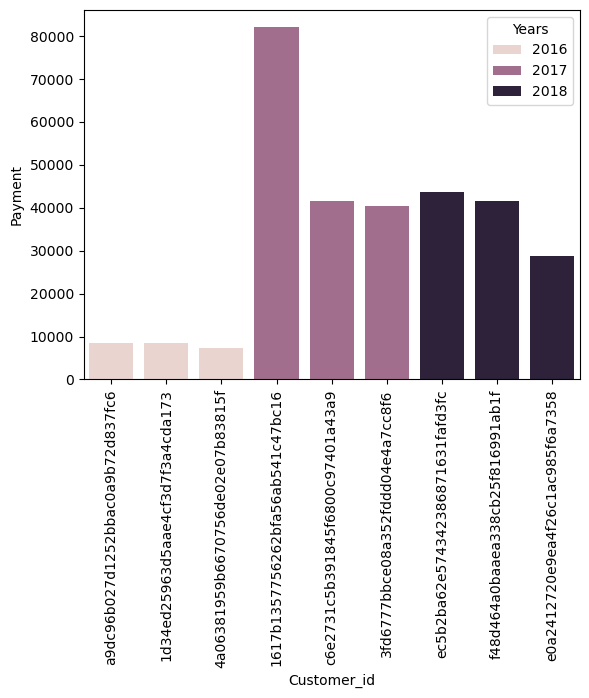

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

query='''select years, customer_id,payment, ranks from(select year(o.order_purchase_timestamp) as years, o.customer_id,sum(p.payment_value) as payment,
rank() over(partition by year(o.order_purchase_timestamp) order by sum(p.payment_value) desc) as ranks
from customers c 
join 
orders o 
on c.customer_id=o.customer_id
join
payments p
on o.order_id=p.order_id
group by years,o.customer_id
)a where ranks<=3'''

cursor.execute(query)
data=cursor.fetchall()

df=pd.DataFrame(data,columns=['Years','Customer_id','Payment' ,'rank'])
sns.barplot(x='Customer_id',y='Payment',data=df,hue='Years')
plt.xticks(rotation=90)